In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from keras.layers import Flatten, Dense
from keras.models import Model
from keras.preprocessing.image import  img_to_array, load_img
from keras.applications.mobilenet import MobileNet, preprocess_input 
from keras.losses import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator

#  Building our Model To train the data 

In [28]:
# Working with pre trained model 

base_model = MobileNet( input_shape=(224,224,3), include_top= False )

for layer in base_model.layers:
  layer.trainable = False


x = Flatten()(base_model.output)
x = Dense(units=7 , activation='softmax' )(x)

# creating our model.
model = Model(base_model.input, x)

In [29]:
model.compile(optimizer='adam', loss= categorical_crossentropy , metrics=['accuracy']  )

# Preparing our data using data generator

In [30]:
train_datagen = ImageDataGenerator(
     zoom_range = 0.2, 
     shear_range = 0.2, 
     horizontal_flip=True, 
     rescale = 1./255
)

train_data = train_datagen.flow_from_directory(directory= r"C:\Users\hp\OneDrive\Desktop\Face Emotion Detection\train", 
                                               target_size=(224, 224), 
                                               batch_size=32)



train_data.class_indices

Found 350 images belonging to 7 classes.


{'Angry': 0,
 'Disguist': 1,
 'Fear': 2,
 'Happy': 3,
 'Neutral': 4,
 'Sad': 5,
 'Surprise': 6}

In [31]:
val_datagen = ImageDataGenerator(rescale = 1./255 )

val_data = val_datagen.flow_from_directory(directory= r"C:\Users\hp\OneDrive\Desktop\Face Emotion Detection\test", 
                                           target_size=(224,224), 
                                           batch_size=32,
                                  )

Found 350 images belonging to 7 classes.


# visualizaing the data that is fed to train data gen

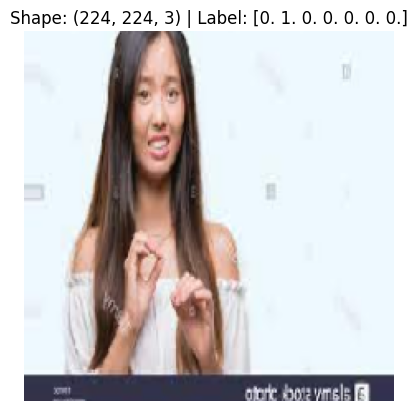

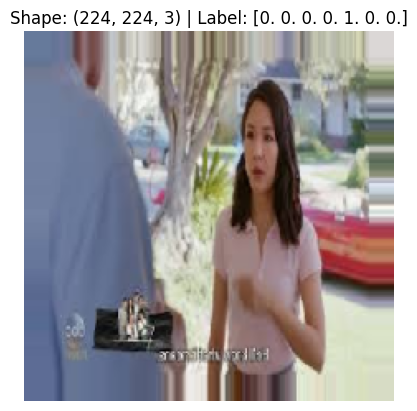

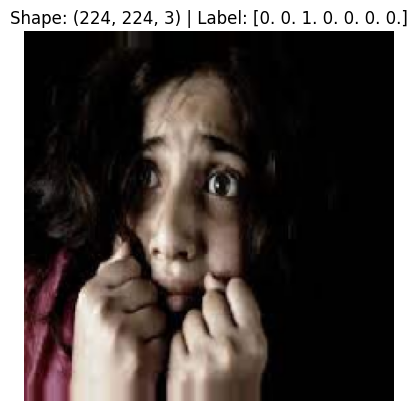

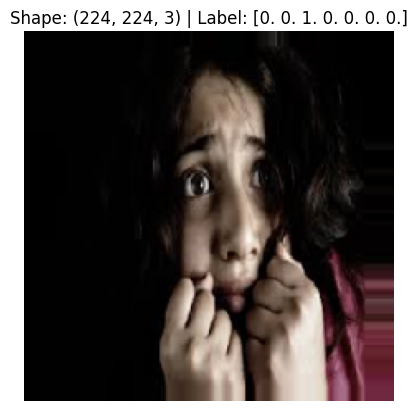

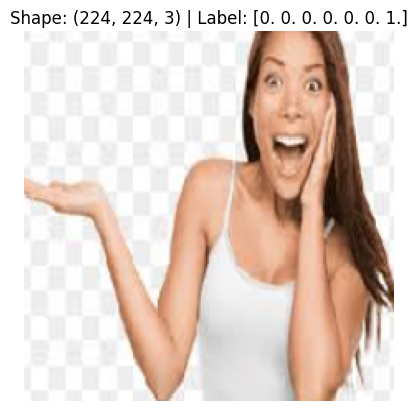

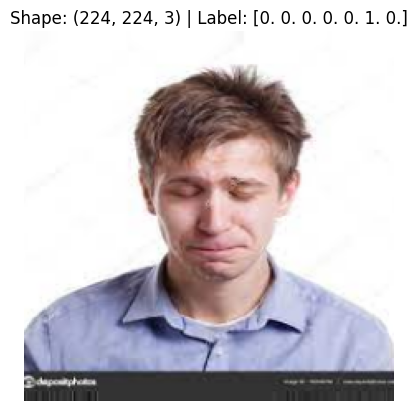

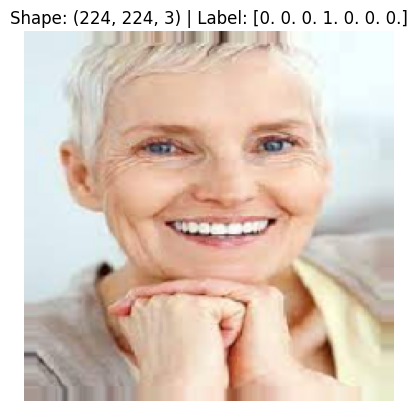

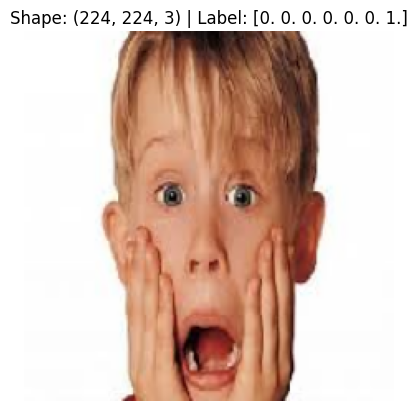

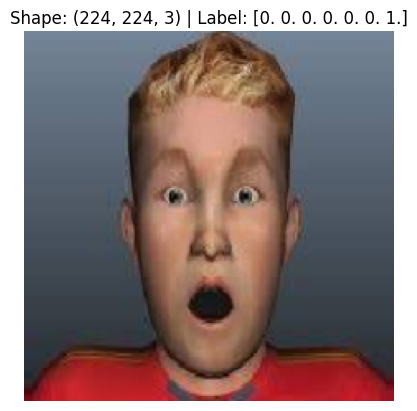

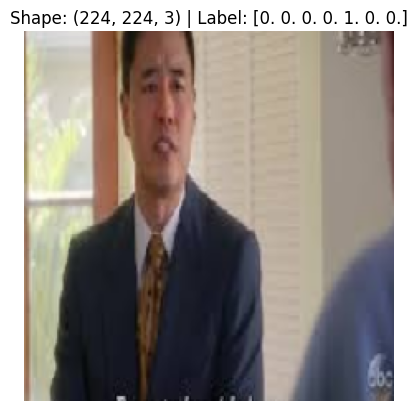

In [34]:
t_img, label = next(train_data)

#-----------------------------------------------------------------------------
# function to plot the images 
def plotImages(img_arr, label):
    """
    input  :- images array (batch of images) and their labels
    output :- plots up to 10 images
    """
    count = 0
    for im, l in zip(img_arr, label):
        plt.imshow(im)  # im is already normalized from ImageDataGenerator
        plt.title(f"Shape: {im.shape} | Label: {l}")
        plt.axis('off')  # Correct way to hide axes
        plt.show()
        
        count += 1
        if count == 10:
            break

#-----------------------------------------------------------------------------
# function call to plot the images 
plotImages(t_img, label)


# having early stopping and model check point

In [39]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

# Early stopping
es = EarlyStopping(monitor='val_accuracy', min_delta=0.01, patience=5, verbose=1, mode='auto')

# Model checkpoint
mc = ModelCheckpoint(filepath="best_model.keras", monitor='val_accuracy', verbose=1, save_best_only=True, mode='auto')

# Putting callbacks in a list
call_back = [es, mc]


In [40]:
history = model.fit(
    train_data,
    validation_data=val_data,   # validation dataset (make sure you define it)
    epochs=50,                  # number of epochs
    callbacks=call_back         # pass the callback list
)


Epoch 1/50


c:\Users\hp\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 415ms/step - accuracy: 0.2008 - loss: 9.2303
Epoch 1: val_accuracy improved from -inf to 0.44857, saving model to best_model.keras
11/11 ━━━━━━━━━━━━━━━━━━━━ 19s 1s/step - accuracy: 0.2041 - loss: 9.2925 - val_accuracy: 0.4486 - val_loss: 6.1055
Epoch 2/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 362ms/step - accuracy: 0.5381 - loss: 5.0632
Epoch 2: val_accuracy improved from 0.44857 to 0.68000, saving model to best_model.keras
11/11 ━━━━━━━━━━━━━━━━━━━━ 10s 758ms/step - accuracy: 0.5392 - loss: 5.0067 - val_accuracy: 0.6800 - val_loss: 2.4151
Epoch 3/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 390ms/step - accuracy: 0.6531 - loss: 2.5629
Epoch 3: val_accuracy improved from 0.68000 to 0.82571, saving model to best_model.keras
11/11 ━━━━━━━━━━━━━━━━━━━━ 10s 800ms/step - accuracy: 0.6558 - loss: 2.5248 - val_accuracy: 0.8257 - val_loss: 0.7781
Epoch 4/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 401ms/step - accuracy: 0.8209 - loss: 0.9780
Epoch 4: val_accuracy improved from 0.82571 to 0.945

In [43]:

# Loading the best fit model 
from keras.models import load_model
model = load_model(r"C:\Users\hp\OneDrive\Desktop\Face Emotion Detection\best_model.keras")

In [46]:
h = history.history  # Assuming 'history' is the variable returned from model.fit()
print(h.keys())

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


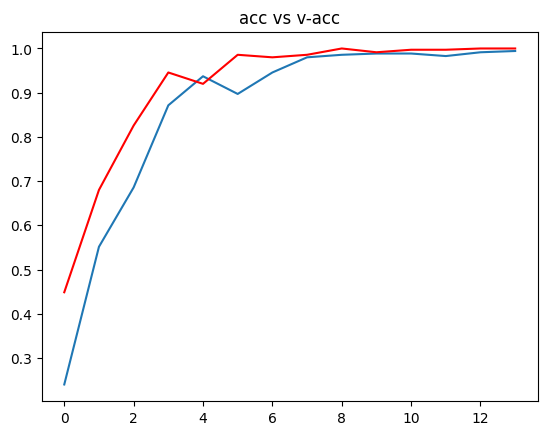

In [47]:
plt.plot(h['accuracy'])
plt.plot(h['val_accuracy'] , c = "red")
plt.title("acc vs v-acc")
plt.show()

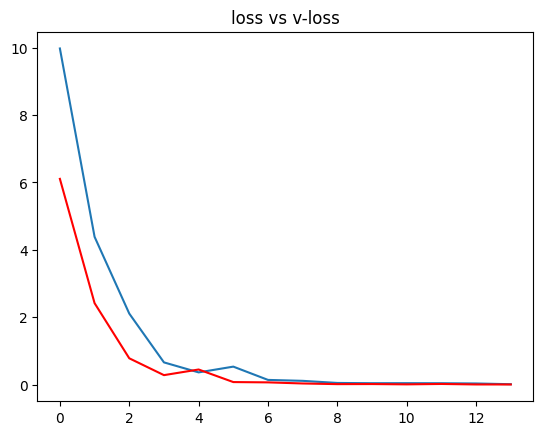

In [48]:
plt.plot(h['loss'])
plt.plot(h['val_loss'] , c = "red")
plt.title("loss vs v-loss")
plt.show()

In [49]:
# just to map o/p values 
op = dict(zip( train_data.class_indices.values(), train_data.class_indices.keys()))